Before: 1488
After: 4
0.03769629626957275 0.010397710724117578


/Users/Dysthe/opt/anaconda3/lib/python3.9/site-packages/trackpy/motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
/Users/Dysthe/opt/anaconda3/lib/python3.9/site-packages/trackpy/motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


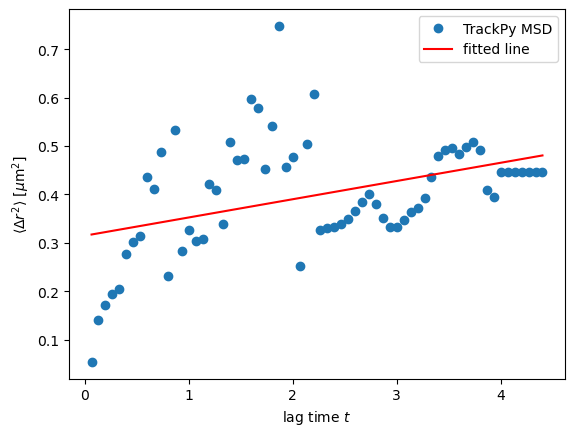

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd 
from pandas import DataFrame, Series
# from PIL import Image
from multiprocessing import freeze_support
import pims 
import trackpy as tp 

R = 0.5*(10**(-6)) #radius of your particle; half a micro meter
# mu = 0.0010016 #dynamic viscosity 
eta = 0.9532*(10**(-3)) #Pa*s
T = 295.15 #K aka 22 C
k = 1.380649*(10**(-23)) #Boltzmann constant

D = (k*T)/(6*np.pi*eta*R)
# print(D)


@pims.pipeline 
def gray(image):
    return image[:, :, 1]


def main():
    # frames = pims.open('../uke2/no_contrast/*.tif')
    frames = gray(pims.open('Stack2/brownian*.png')) #use pims to open the video
    tp.quiet() 
    f = tp.batch(frames, 11, minmass = 100, threshold  = 10, processes = 'auto') #100 might have also worked 
    # tp.annotate(f, frames[0]);

    t = tp.link(f, 10, memory=3)
    t1 = tp.filter_stubs(t, 7)
    # t2 = t1[((t1['mass'] > 260) & (t1['size'] < 2.6) & (t1['ecc'] < 0.3))]
# # Compare the number of particles in the unfiltered and filtered data.
    print('Before:', t['particle'].nunique())
    print('After:', t1['particle'].nunique())
    # plt.figure()
    # tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass
    # tp.annotate(t1[t1['frame'] == 0], frames[0]);
    # plt.figure()
    # tp.plot_traj(t1);
    d = tp.compute_drift(t1)
    # d.plot()
    tm = tp.subtract_drift(t1.copy(), d)
    # plt.show()
    # ax = tp.plot_traj(tm)
    # plt.show()
    em = tp.emsd(tm, 260/1902., 15)
    time = em.index
    res = stats.linregress(em.index,em)
    print(res.slope, res.stderr)
   # microns per pixel = 100/285., frames per second = 24
    plt.plot(em.index, em, 'o', label = 'TrackPy MSD') #plot the MSD
    plt.plot(em.index, res.intercept + res.slope*em.index, 'r', label='fitted line')
    
    # # plt.xscale('log')
    # # plt.yscale('log')
    plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
    plt.xlabel('lag time $t$')
    plt.legend()
    plt.show()


if __name__ == '__main__':
    freeze_support()
    main()



    




# f = tp.locate(frames[0], 9, invert = True)
# tp.annotate(f, frames[0])

# fig, ax = plt.subplots()
# ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count')
# plt.show()


# f = tp.batch(frames, 9, minmass = 200, threshold  = 5, processes = 1)#100 might have also worked 


# tp.annotate(f, frames)

# fig, ax = plt.subplots()
# ax.hist(f['mass'], bins=20)
# ax.set(xlabel='mass', ylabel='count')
# plt.show()

# a = tp.subpx_bias(f)
# plt.show()



